# Thresholding

In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

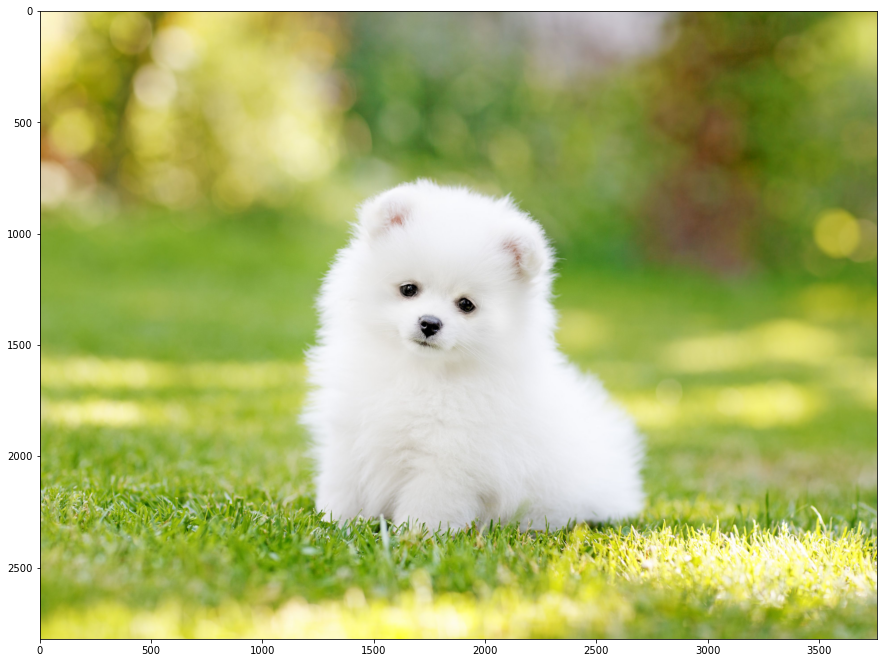

In [42]:
# Load an image
dog = cv2.imread('img/dog.jpg')
rgb_dog = cv2.cvtColor(dog, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15,15))
plt.imshow(rgb_dog)

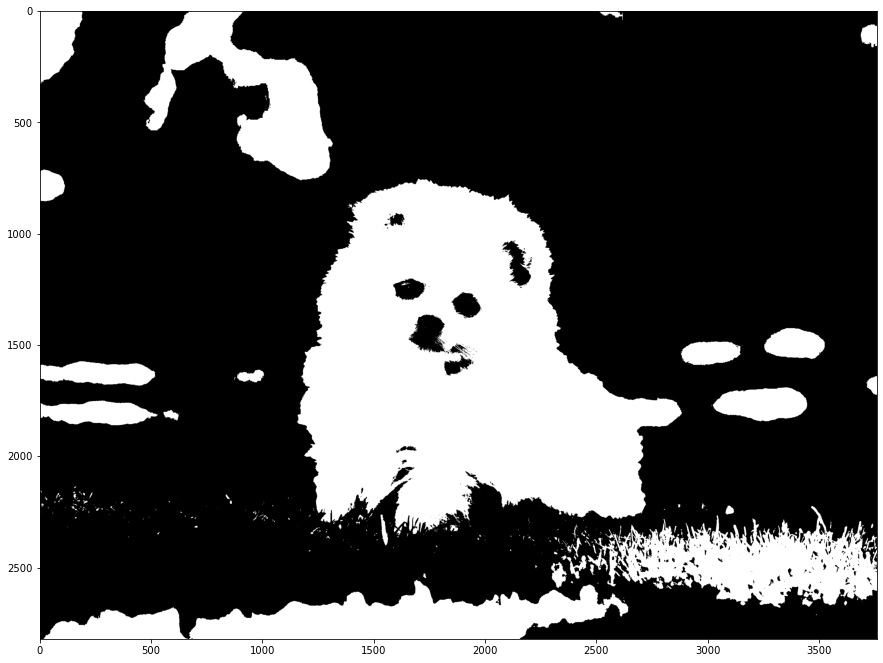

In [34]:
# apply all types of thresholding that openCV offers (like thresh_binary, thresh_trunc, tozero, etc)
gray_dog = cv2.cvtColor(dog, cv2.COLOR_BGR2GRAY)
retval, dst = cv2.threshold(gray_dog, 200, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(15,15))
plt.imshow(dst, cmap='gray')

In [35]:
dst.max()

255

In [31]:
# cv2.imshow('dog', dst)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

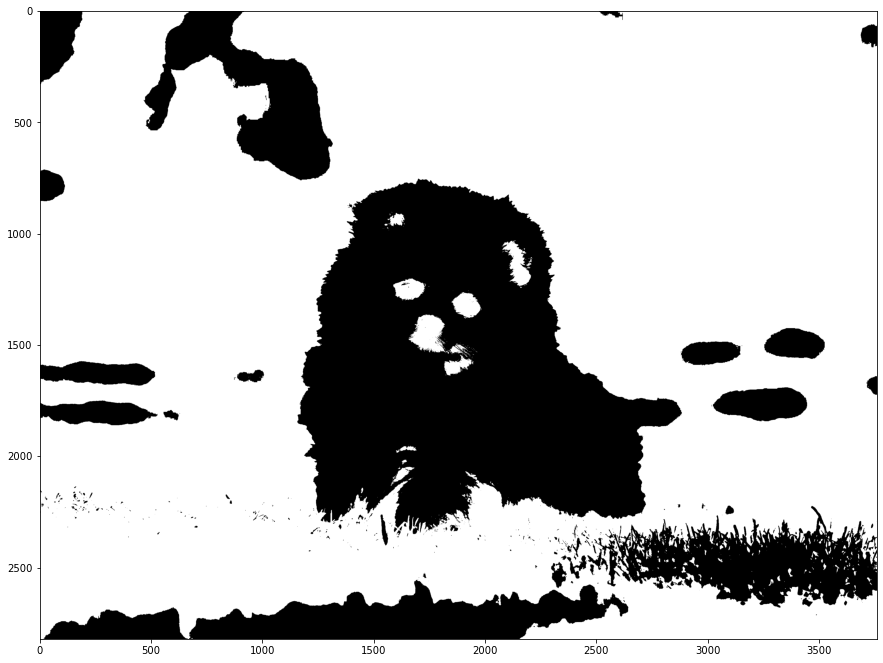

In [23]:
retval, dst = cv2.threshold(gray_dog, 200, 255, cv2.THRESH_BINARY_INV)
plt.figure(figsize=(15,15))
plt.imshow(dst, cmap='gray')

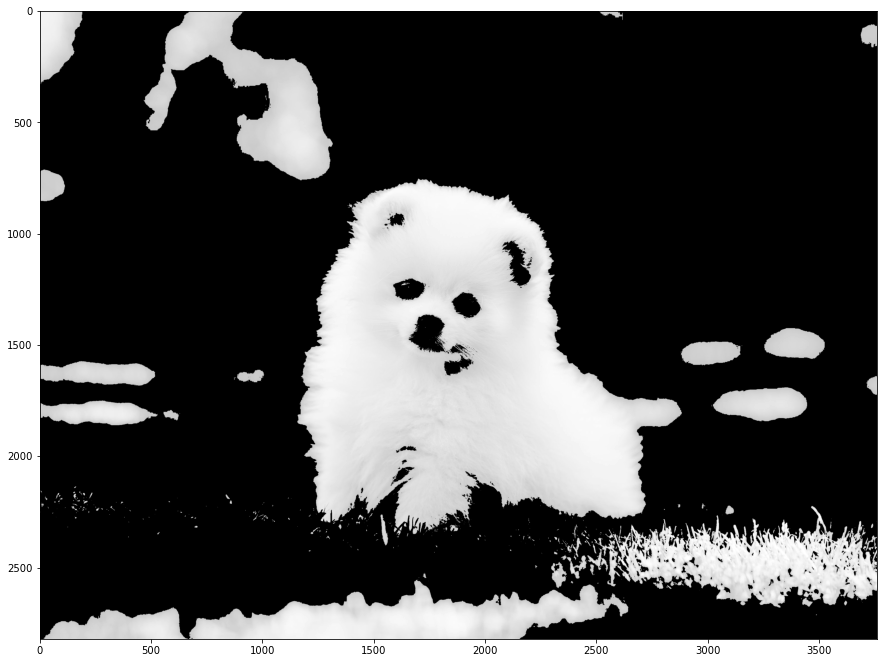

In [24]:
retval, dst = cv2.threshold(gray_dog, 200, 255, cv2.THRESH_TOZERO)
plt.figure(figsize=(15,15))
plt.imshow(dst, cmap='gray')

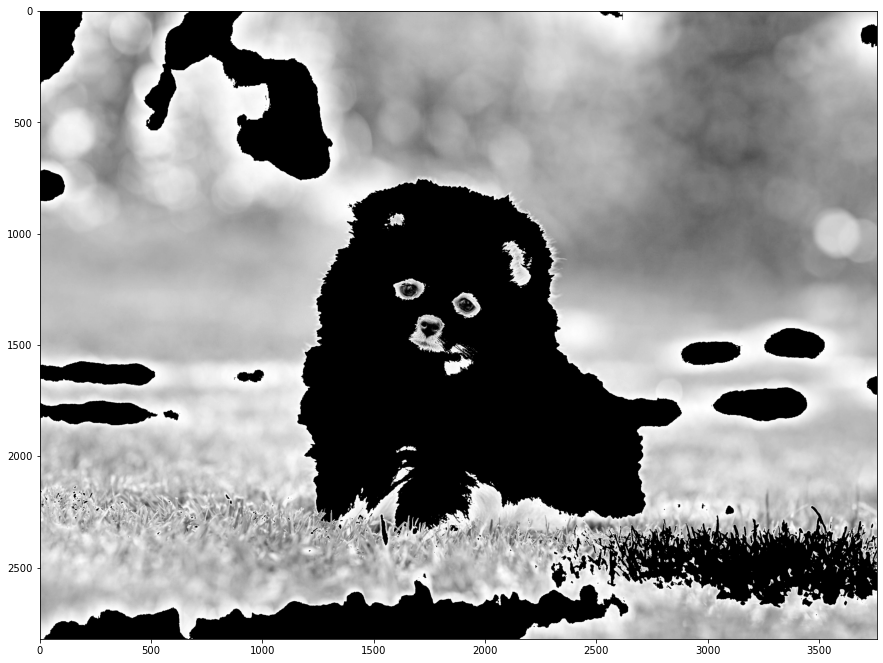

In [25]:
retval, dst = cv2.threshold(gray_dog, 200, 255, cv2.THRESH_TOZERO_INV)
plt.figure(figsize=(15,15))
plt.imshow(dst, cmap='gray')

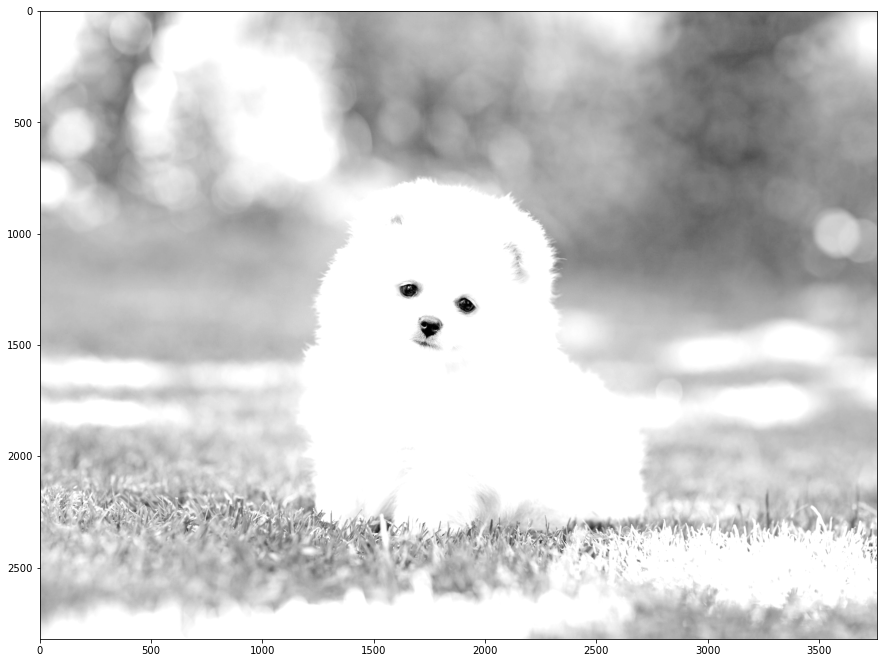

In [28]:
retval, dst = cv2.threshold(gray_dog, 200, 255, cv2.THRESH_TRUNC)
plt.figure(figsize=(15,15))
plt.imshow(dst, cmap='gray')

# Otsu

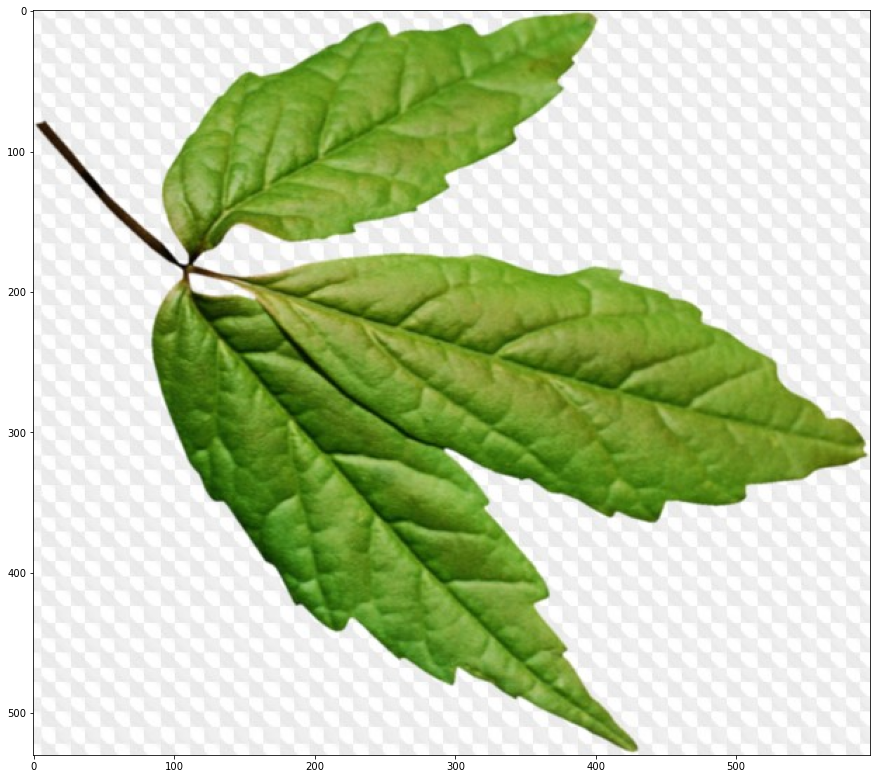

In [51]:
leaf = cv2.imread('img/leaf.jpg')

rgb_leaf = cv2.cvtColor(leaf,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15,15))
plt.imshow(rgb_leaf)

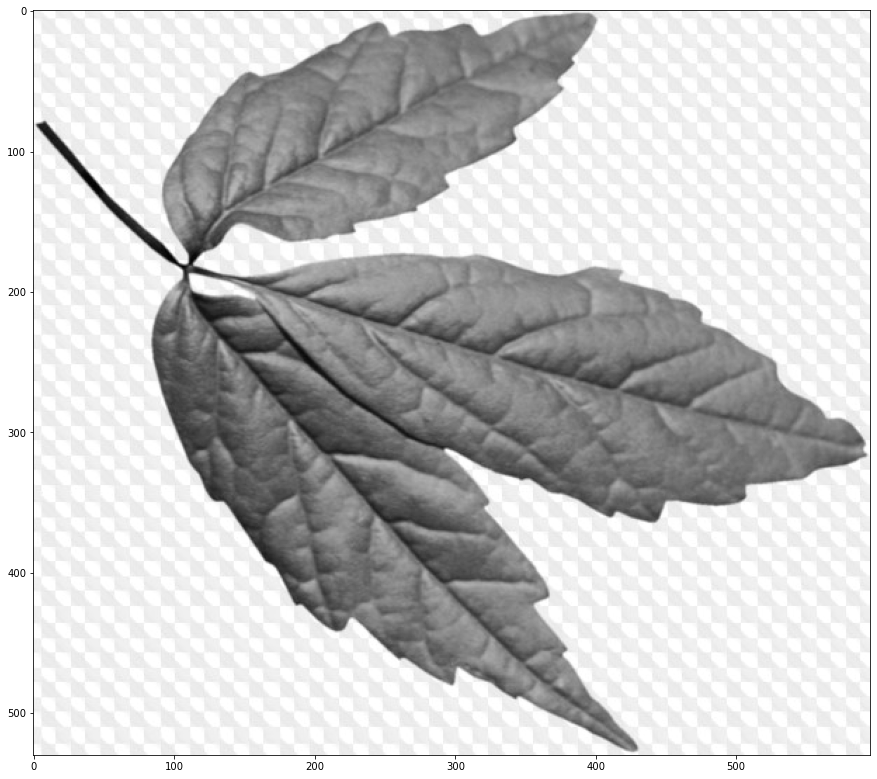

In [63]:
gray_leaf = cv2.cvtColor(leaf, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(15,15))
plt.imshow(gray_leaf, cmap='gray')

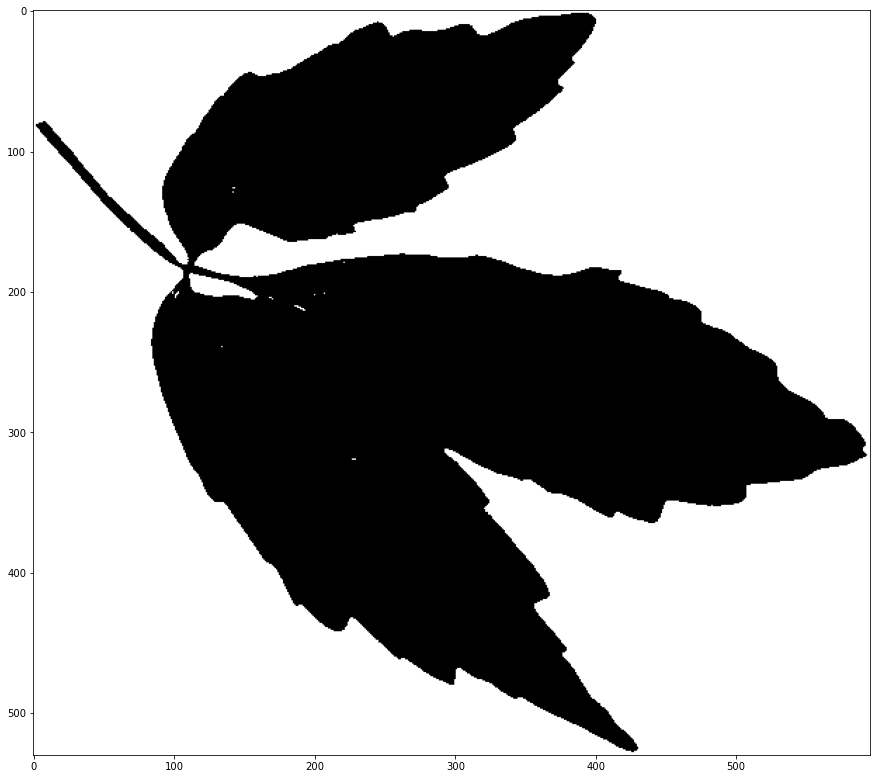

In [64]:
ret, otsu = cv2.threshold(gray_leaf,0,255, cv2.THRESH_BINARY+ cv2.THRESH_OTSU)
plt.figure(figsize=(15,15))
plt.imshow(otsu, cmap='gray')

In [65]:
ret

181.0

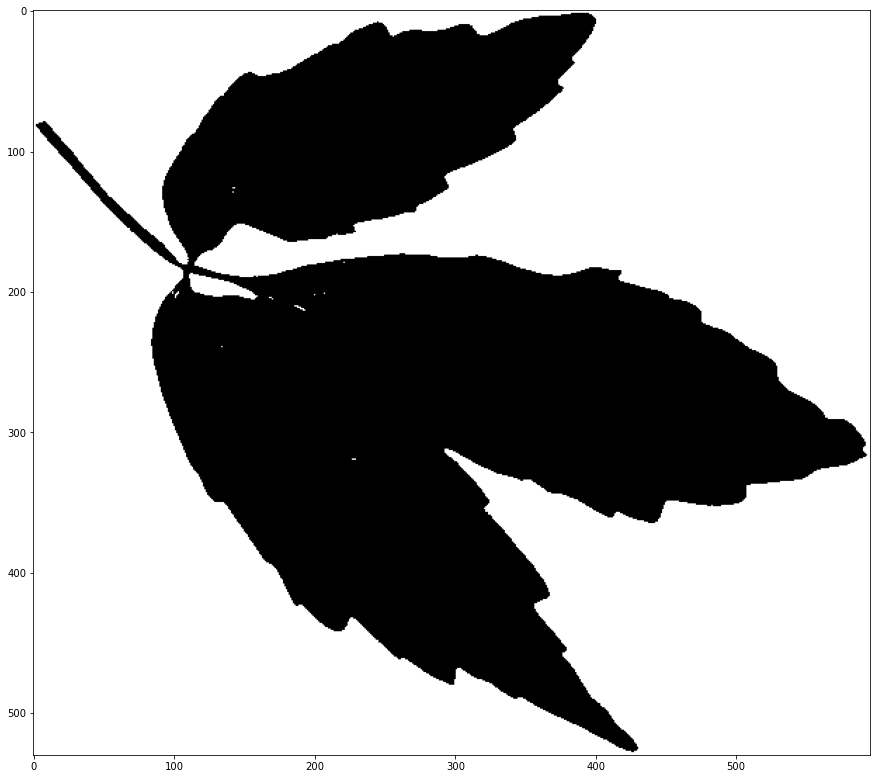

In [60]:
ret, otsu = cv2.threshold(gray_leaf,181,255, cv2.THRESH_BINARY+ cv2.THRESH_OTSU)
plt.figure(figsize=(15,15))
plt.imshow(otsu, cmap='gray')

# Adaptive thresholding

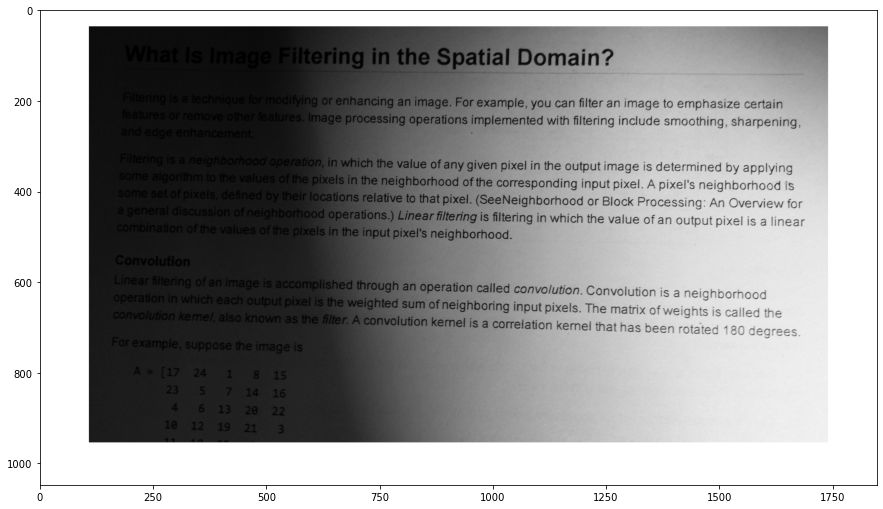

In [75]:
text_img = cv2.imread('imgs/notes.png')
text_img_gray = cv2.imread('imgs/notes.png', cv2.IMREAD_GRAYSCALE)
#text_img_gray = cv2.imread('imgs/notes.png', 0)
plt.figure(figsize=(15,15))
plt.imshow(text_img_gray, cmap='gray')

In [74]:
cv2.IMREAD_GRAYSCALE

0

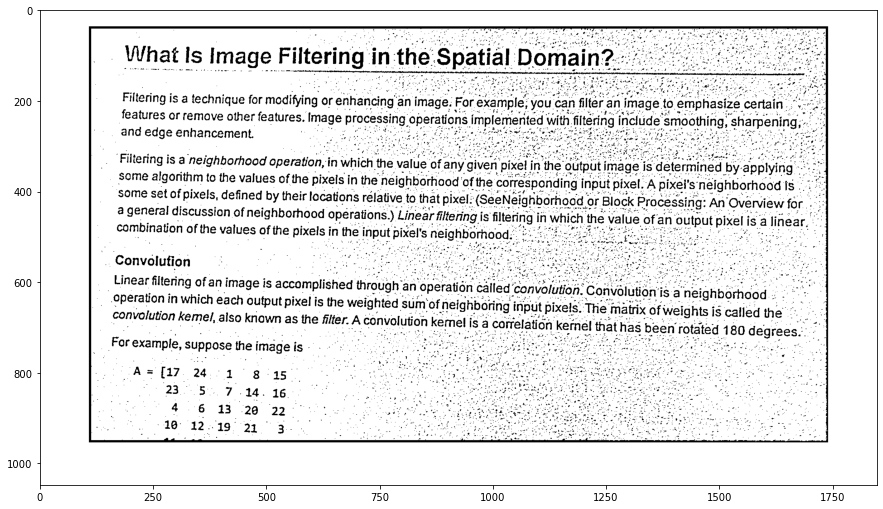

In [83]:
dst = cv2.adaptiveThreshold(text_img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 3)
plt.figure(figsize=(15,15))
plt.imshow(dst, cmap='gray')

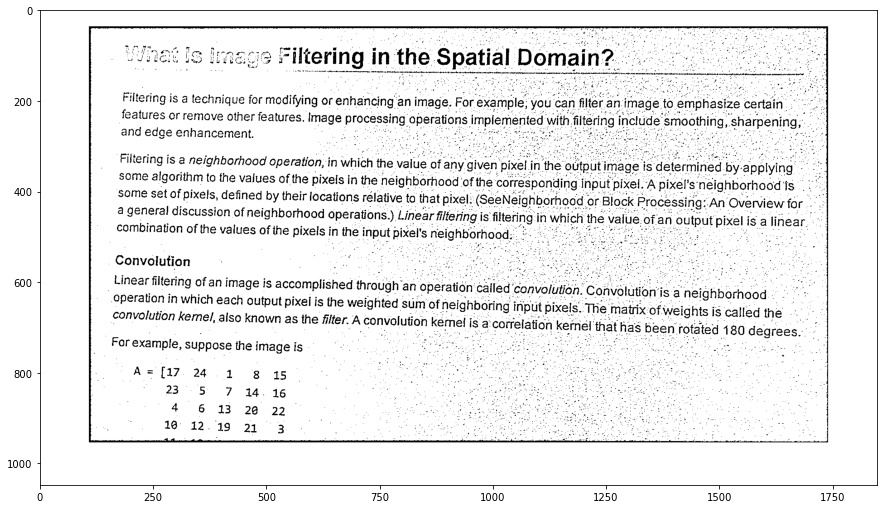

In [84]:
dst = cv2.adaptiveThreshold(text_img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 3)
plt.figure(figsize=(15,15))
plt.imshow(dst, cmap='gray')

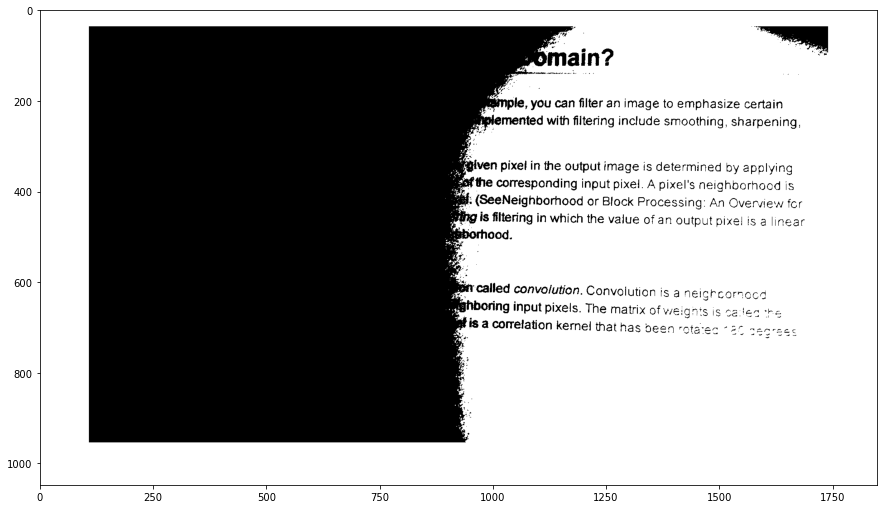

In [85]:
ret, binary = cv2.threshold(text_img_gray,127,255, cv2.THRESH_BINARY)
plt.figure(figsize=(15,15))
plt.imshow(binary, cmap='gray')

# Morphological Transformations

In [88]:
import numpy as np

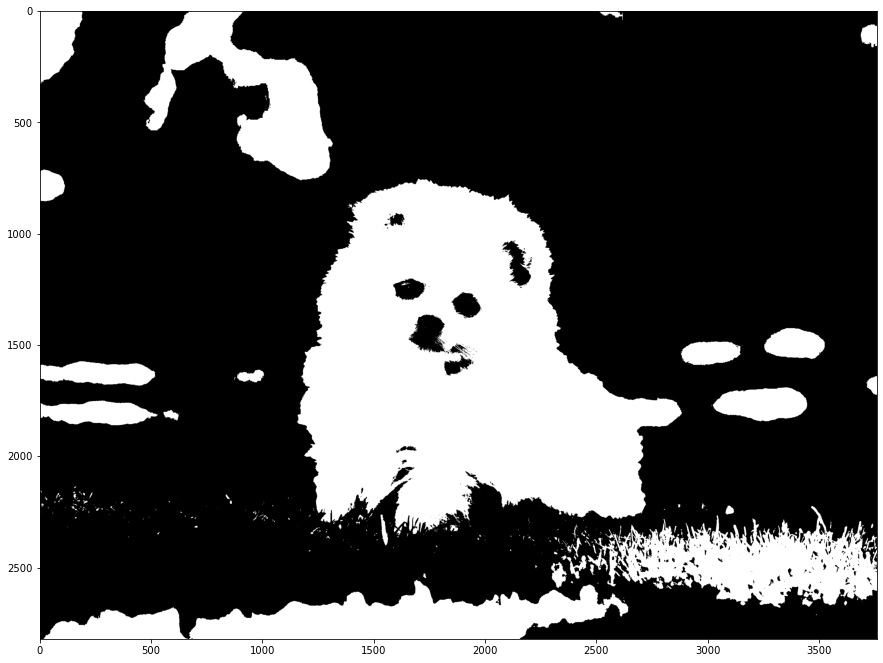

In [94]:
ret, threshold = cv2.threshold(gray_dog, 200, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(15,15))
plt.imshow(threshold, cmap='gray')

### Dilation

In [102]:
# Creating a simple 3 by 3 kernel of ones with numpy
kernel = np.ones((9, 9), np.uint8)
kernel

array([[1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=uint8)

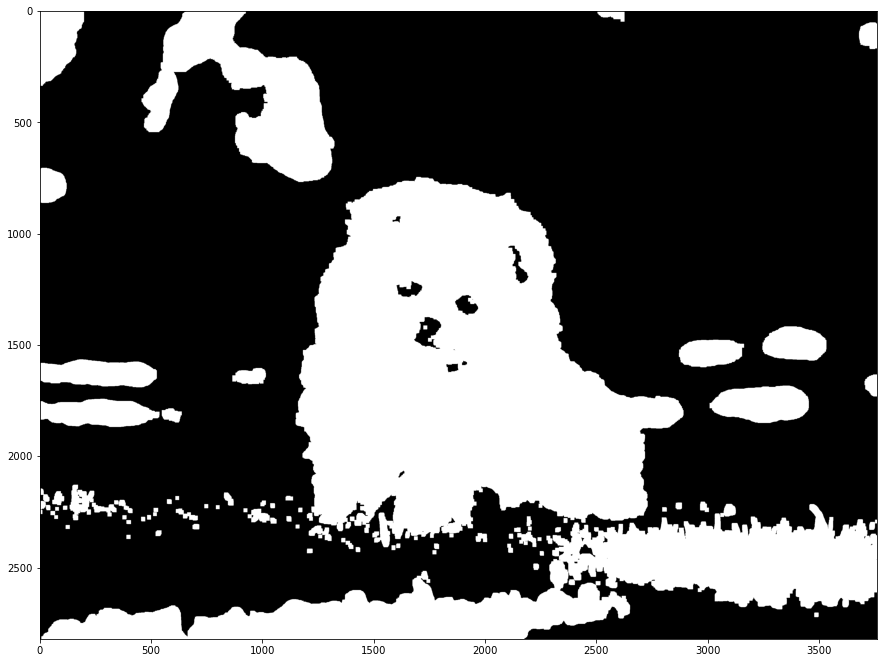

In [104]:
# Dilation
# thresholding and applying dilation with openCV, trying different number of iterations

ret, threshold = cv2.threshold(gray_dog, 200, 255, cv2.THRESH_BINARY)

dilation = cv2.dilate(threshold, kernel, iterations= 2)
plt.figure(figsize=(15,15))
plt.imshow(dilation, cmap='gray')

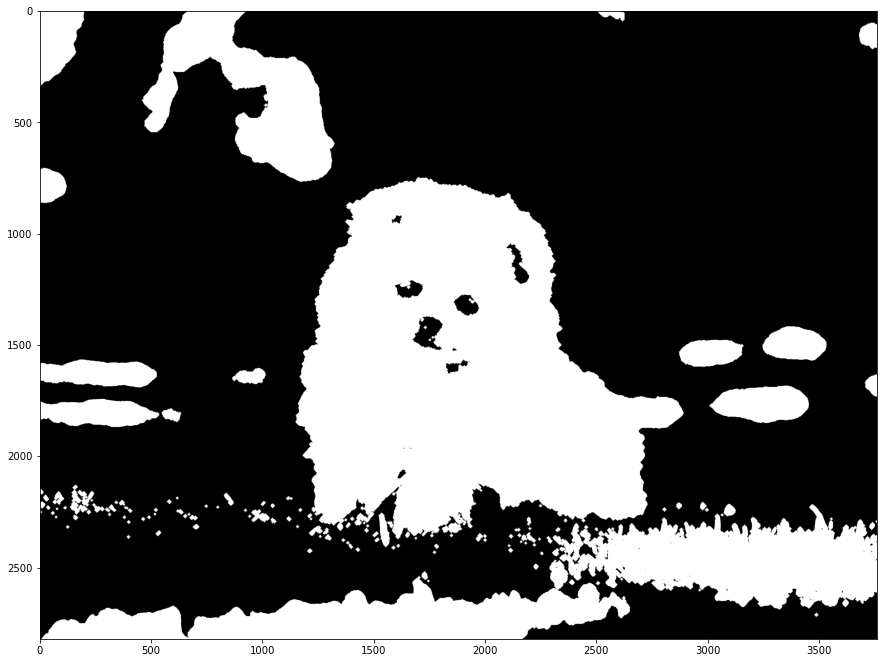

In [105]:
# Repeating the operation by creating a special kernel with cv2.getStructuringElement
# trying different elements like cv2.MORPH_RECT, cv2.MORPH_ELLIPSE and cv2.MORPH_CROSS

cross = cv2.getStructuringElement(cv2.MORPH_CROSS, (9,9))
cross
ret, threshold = cv2.threshold(gray_dog, 200, 255, cv2.THRESH_BINARY)

dilation = cv2.dilate(threshold, cross, iterations= 2)
plt.figure(figsize=(15,15))
plt.imshow(dilation, cmap='gray')

### Erosion

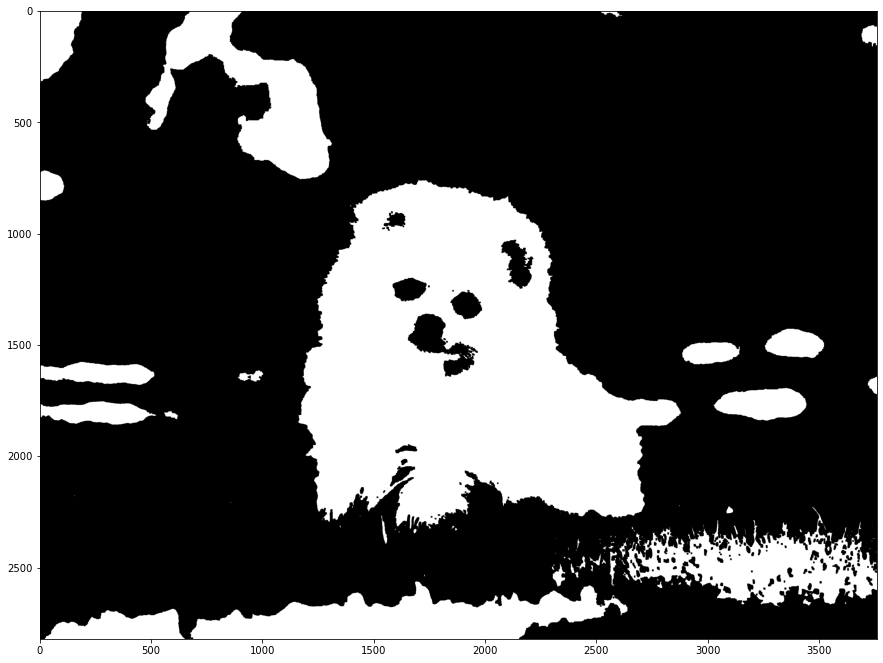

In [97]:
# Erosion
kernel = np.ones((3, 3), np.uint8)
erosion = cv2.erode(threshold, kernel, iterations = 3)
plt.figure(figsize=(15,15))
plt.imshow(erosion, cmap='gray')

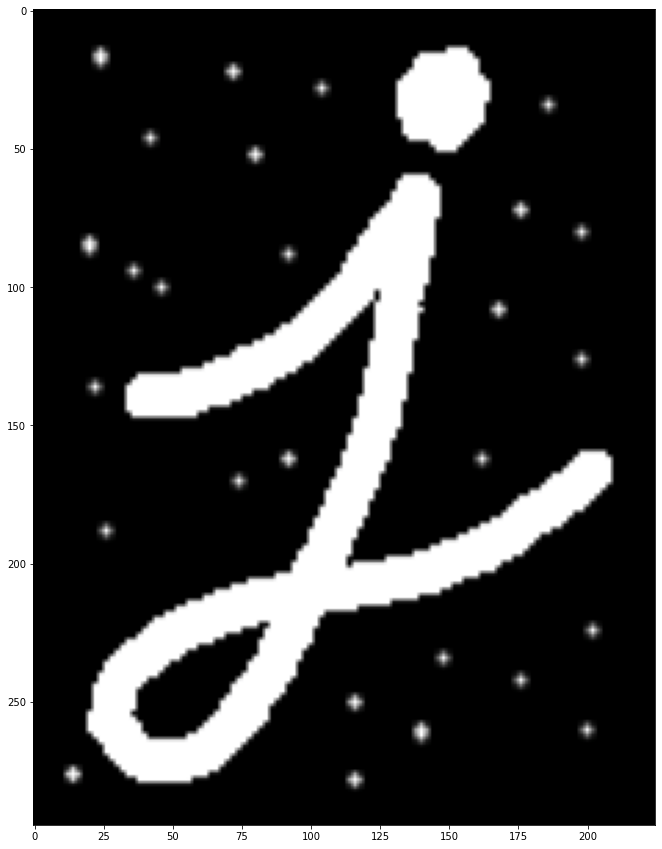

In [118]:
# Opening
j2 = cv2.imread('imgs/j2.png')
plt.figure(figsize=(15,15))
plt.imshow(j2, cmap='gray')


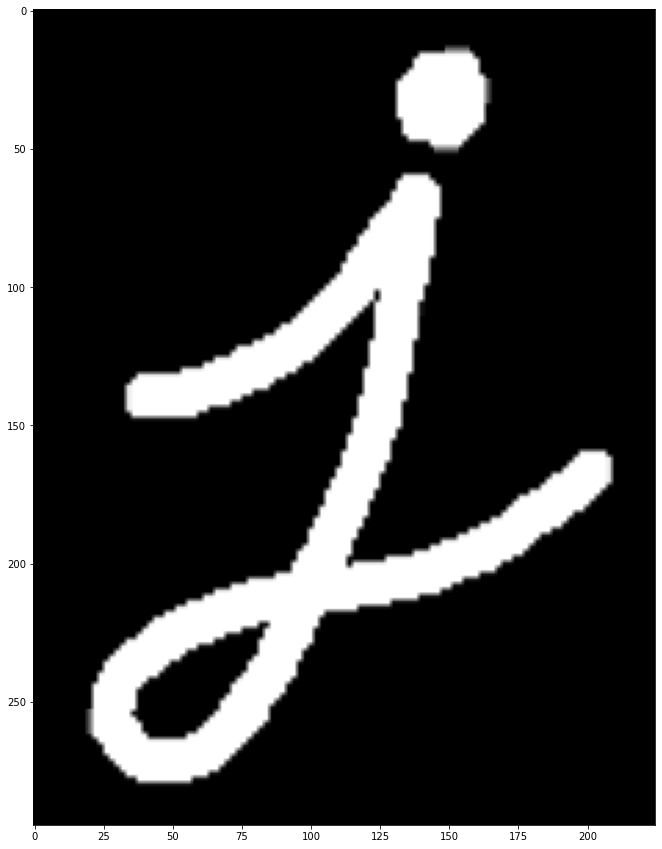

In [119]:
opening = cv2.morphologyEx(j2, cv2.MORPH_OPEN, kernel)
plt.figure(figsize=(15,15))
plt.imshow(opening, cmap='gray')

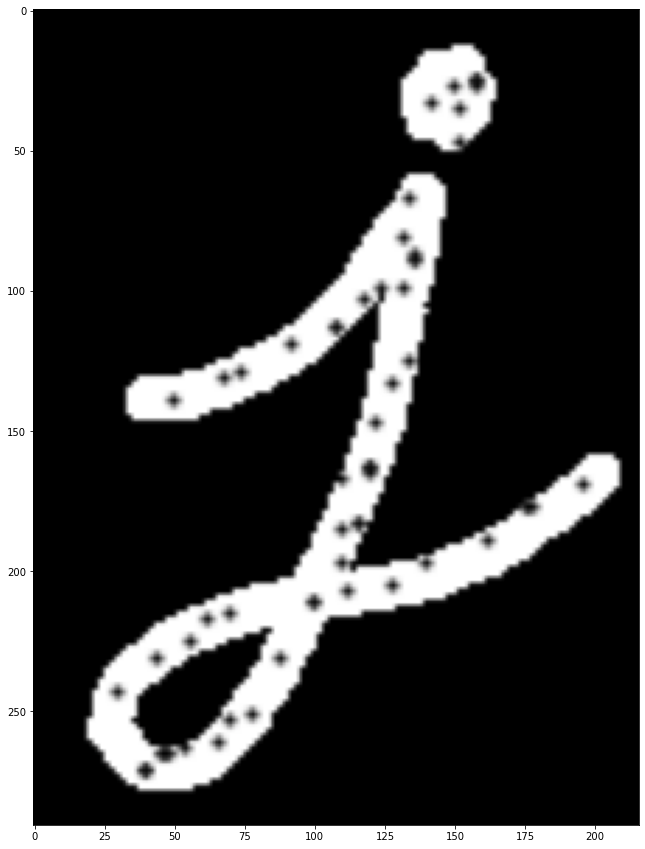

In [120]:
# Closing
j1 = cv2.imread('imgs/j1.png')
plt.figure(figsize=(15,15))
plt.imshow(j1, cmap='gray')

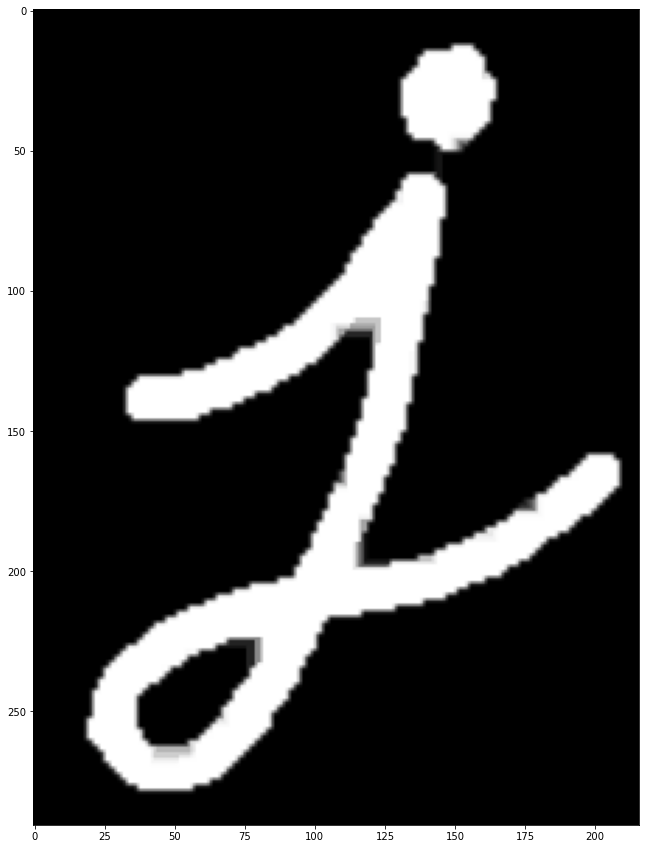

In [121]:
closing = cv2.morphologyEx(j1, cv2.MORPH_CLOSE, kernel)
plt.figure(figsize=(15,15))
plt.imshow(closing, cmap='gray')